### 00_Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 01_Simple data

In [2]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

D = np.array([[0],[0],[0],[1]])

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [4]:
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)

    return y

In [5]:
def calc_error(d, y):
    e = d - y
    delta = y*(1-y)*e

    return delta

In [6]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y = calc_output(W, x)
        delta = calc_error(d, y)

        dW = alpha * delta * x
        W = W + dW
    
    return W, delta

In [7]:
W = 2*np.random.random((1,3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)

    hist_loss.append(delta)
    hist_W.append(W)

    if epoch % 100 == 0:
        print(W)

[[ 0.709343   -0.11211165  0.33951482]]
[[ 2.62821153  2.5900597  -3.97463402]]
[[ 3.45674344  3.43744333 -5.24526565]]
[[ 3.95224591  3.93945819 -5.99886097]]
[[ 4.3017588   4.29227311 -6.52824116]]
[[ 4.57028302  4.56277661 -6.93397321]]
[[ 4.78762721  4.78143264 -7.26186014]]
[[ 4.96982836  4.96456405 -7.5364313 ]]
[[ 5.12646686  5.12189509 -7.7722929 ]]
[[ 5.26370688  5.25966992 -7.9788203 ]]


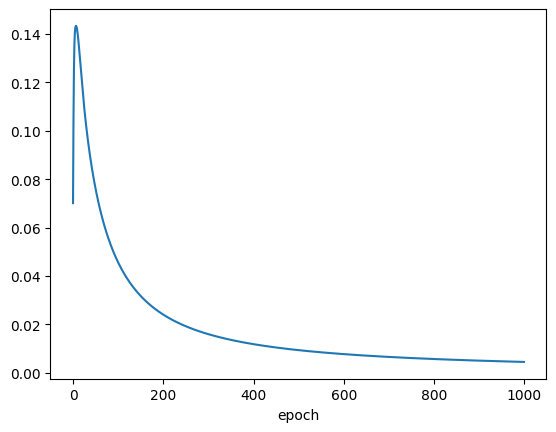

In [8]:
plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

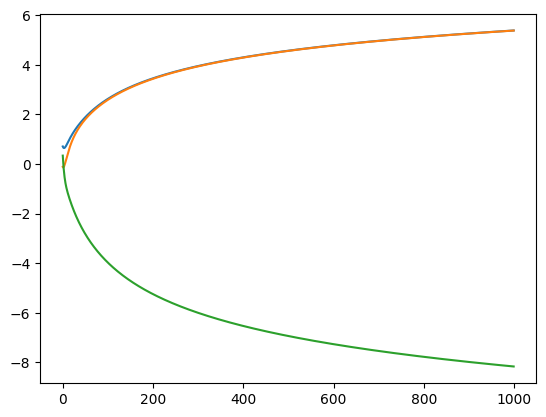

In [9]:
plt.plot(np.array(hist_W).reshape(-1,3));

In [10]:
N = 4
for k in range(N):
    x = X[k, :].T
    y = calc_output(W, x)

    print(y)

[0.0002856]
[0.05843267]
[0.05863192]
[0.93117719]


In [11]:
def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)

    return y, y1

In [12]:
def calc_delta(d, y):
    e = d - y
    delta = y*(1-y) * e

    return delta

In [13]:
def calc_delta1(W2, delta,y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1) * e1

    return delta1

In [14]:
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        dW1 = (alpha*delta1).reshape(4,1) * x.reshape(1,3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

In [15]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

D = np.array([[0],[1],[1],[0]])

W1 = 2*np.random.random((4,3)) - 1
W2 = 2*np.random.random((1,4)) -1

In [16]:
alpha = 0.9
for epoh in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [17]:
N = 4
for k in range(4):
    x = X[k ,:].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.01109804]
[0.98944684]
[0.98940672]
[0.01050545]
